In [9]:
import pandas as pd

df = pd.read_csv("titanic.csv")

In [11]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age x 2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


In [12]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age x 2'],
      dtype='object')

<AxesSubplot:>

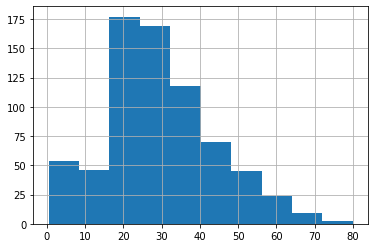

In [13]:
df.Age.hist()

<AxesSubplot:>

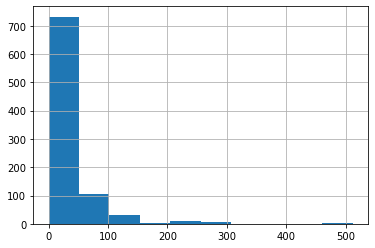

In [14]:
df.Fare.hist()

<AxesSubplot:>

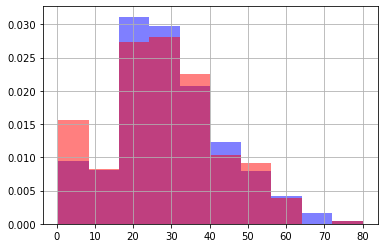

In [25]:
df.Age.hist(alpha=0.5, color="b", density=True)
# df.query("Survived == 1").Age.hist(alpha=0.5, color="r")
df[df["Survived"] == 1].Age.hist(alpha=0.5, color="r", density=True)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

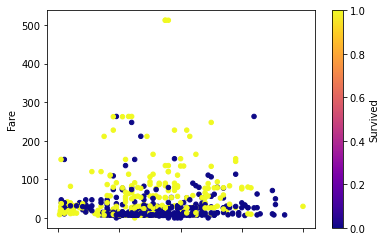

In [31]:
df.plot.scatter("Age", "Fare", c="Survived", cmap="plasma")

In [33]:
df[["Age", "Survived"]].corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


In [37]:
df = pd.read_csv("coin_Bitcoin.csv")

In [39]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

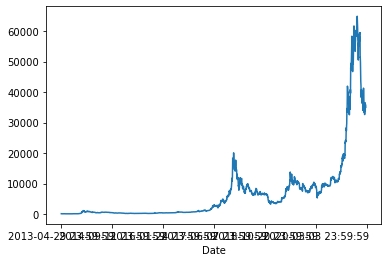

In [43]:
df.set_index("Date")["High"].plot()


In [45]:
serie = df.set_index("Date")["High"]

In [53]:
serie.rolling(10).mean().plot.bar()
df.set_index("Date")["High"].plot()


<AxesSubplot:xlabel='Date'>

Error in callback <function flush_figures at 0x0000028368F3E3A0> (for post_execute):


KeyboardInterrupt: 

In [52]:
len(serie)

2991

In [59]:
df = pd.read_csv("titanic.csv")
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [69]:
data = df.dropna(subset=["Age", "Embarked"])
data_x = data[["Age", "Sex", "Fare", "Embarked"]]
data_y = data["Survived"]
data_x.count()

Age         712
Sex         712
Fare        712
Embarked    712
dtype: int64

In [75]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
# clf.fit(data_x[:500], data_y[:500])
clf.fit(data_x, data_y)


KNeighborsClassifier(n_neighbors=1)

In [76]:
y_pred = clf.predict(data_x)

clf.score(data_x, data_y)
# clf.score(data_x[500:], data_y[500:])

0.9831460674157303

In [67]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
data.to_csv("res.csv")